In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# PreProcessing

In [ ]:
file_rki = "/content/drive/My Drive/DataScience/Week8/RKI_COVID19.csv"

In [ ]:
df_rki = pd.read_csv(file_rki)

In [ ]:
df_rki.head()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,12548163,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,1001,"16.06.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
1,12548164,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"16.06.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2,12548165,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"16.06.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
3,12548166,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/21 00:00:00,1001,"16.06.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
4,12548167,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/27 00:00:00,1001,"16.06.2020, 00:00 Uhr",0,-9,2020/03/22 00:00:00,0,1,1,Nicht übermittelt


In [ ]:
np.unique(df_rki["Bundesland"])

array(['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'], dtype=object)

In [ ]:
df_rki['Meldedatum'] = pd.to_datetime(df_rki['Meldedatum'])

In [ ]:
def calculate_sumcases_bundesland(df_rki):

  state_data = {}
  uni_states = np.unique(df_rki["Bundesland"])

  for state in uni_states:
    print(state)
    df_state = df_rki[df_rki.Bundesland == state]
    df_state = df_state.sort_values(by=['Meldedatum'])
    df_state = df_state[["AnzahlFall","Meldedatum"]].groupby(by="Meldedatum").sum()

    sum_up = 0
    for i in range(len(df_state["AnzahlFall"])):
      sum_up                += df_state["AnzahlFall"][i]
      df_state["AnzahlFall"][i] = sum_up 
    
    state_data[state] = df_state

  return(state_data)

In [ ]:
state_data = calculate_sumcases_bundesland(df_rki)

Baden-Württemberg
Bayern
Berlin
Brandenburg
Bremen
Hamburg
Hessen
Mecklenburg-Vorpommern
Niedersachsen
Nordrhein-Westfalen
Rheinland-Pfalz
Saarland
Sachsen
Sachsen-Anhalt
Schleswig-Holstein
Thüringen


In [ ]:
state_data["Brandenburg"]

,AnzahlFall
Meldedatum,
2020-03-01,1
2020-03-05,3
2020-03-08,7
2020-03-09,11
2020-03-10,20
...,...
2020-06-10,3320
2020-06-11,3325
2020-06-12,3329


In [ ]:
def create_all_statedf(state_data):
  uni_states = list(state_data.keys())
  df = pd.DataFrame()

  for state in uni_states:
    data_dict = {}
    data_dict = { 'State_Cases': state_data[state]["AnzahlFall"] , "State" : np.repeat(state,len(state_data[state]), axis=0)}
    df_state  = pd.DataFrame(data=data_dict)
    df_state  = df_state.reset_index()
    df = df.append(pd.DataFrame(data = df_state), ignore_index=True)

  return(df)


In [ ]:
df_state_data = create_all_statedf(state_data)

#Example Plot

In [ ]:
df_state_data.tail()

,Meldedatum,State_Cases,State
1636,2020-06-11,3155,Thüringen
1637,2020-06-12,3161,Thüringen
1638,2020-06-13,3171,Thüringen
1639,2020-06-14,3174,Thüringen
1640,2020-06-15,3175,Thüringen


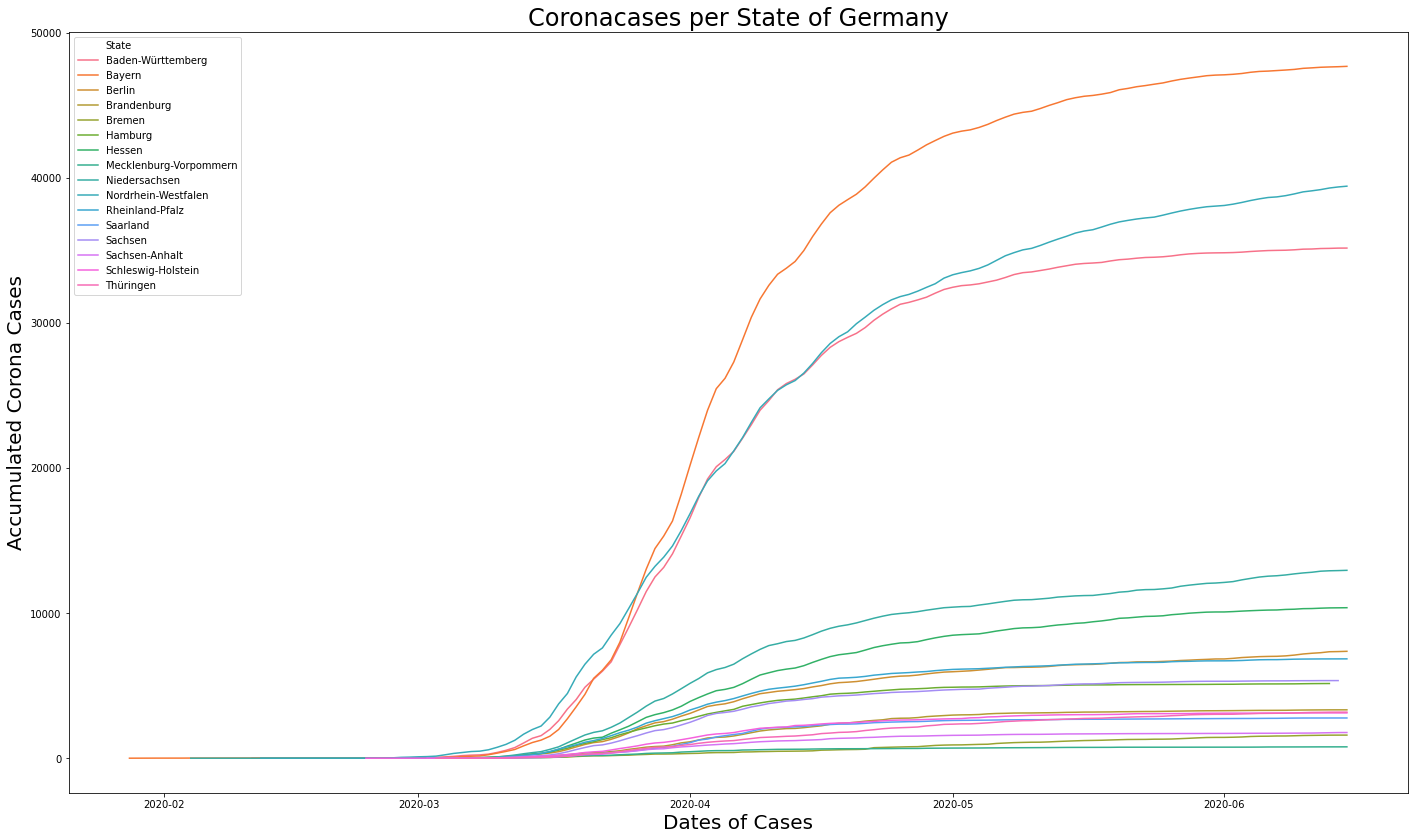

In [ ]:
plt.figure(figsize = (24,14))
#sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = "Meldedatum", y = "State_Cases", data = df_state_data, hue = "State")
 
plt.title("Coronacases per State of Germany", fontsize = 24)
plt.ylabel("Accumulated Corona Cases", fontsize = 20)
plt.xlabel("Dates of Cases", fontsize = 20)
plt.show()